Future Prediciton - Vector Auto Regression Model

In [91]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [92]:
data = pd.read_csv('dataset/tpmd_og.csv', index_col='date')
data.head()
print(data.shape)
data.head()

(244, 6)


,T,RH,LW,WS,GR,Class
date,,,,,,
01-09-2021,32.3,47.0,24,3,51,Non-Conducive
02-09-2021,31.6,45.0,23,2,49,Non-Conducive
03-09-2021,30.4,43.0,21,4,46,Non-Conducive
04-09-2021,31.7,46.0,24,3,50,Non-Conducive
05-09-2021,32.5,50.0,27,1,53,Non-Conducive


In [93]:
data.dtypes

T        float64
RH       float64
LW         int64
WS         int64
GR         int64
Class     object
dtype: object

In [94]:
for (index, colname) in enumerate(data):
    print(data[data.columns[index]])

date
01-09-2021    32.3
02-09-2021    31.6
03-09-2021    30.4
04-09-2021    31.7
05-09-2021    32.5
              ... 
28-04-2022    18.5
29-04-2022    19.6
30-04-2022    20.4
01-05-2022    21.1
02-05-2022    20.0
Name: T, Length: 244, dtype: float64
date
01-09-2021    47.0
02-09-2021    45.0
03-09-2021    43.0
04-09-2021    46.0
05-09-2021    50.0
              ... 
28-04-2022    60.0
29-04-2022    61.0
30-04-2022    64.0
01-05-2022    67.0
02-05-2022    65.0
Name: RH, Length: 244, dtype: float64
date
01-09-2021    24
02-09-2021    23
03-09-2021    21
04-09-2021    24
05-09-2021    27
              ..
28-04-2022    31
29-04-2022    30
30-04-2022    27
01-05-2022    29
02-05-2022    26
Name: LW, Length: 244, dtype: int64
date
01-09-2021    3
02-09-2021    2
03-09-2021    4
04-09-2021    3
05-09-2021    1
             ..
28-04-2022    4
29-04-2022    3
30-04-2022    2
01-05-2022    1
02-05-2022    2
Name: WS, Length: 244, dtype: int64
date
01-09-2021    51
02-09-2021    49
03-09-2021   

0
1
2
3
4
5


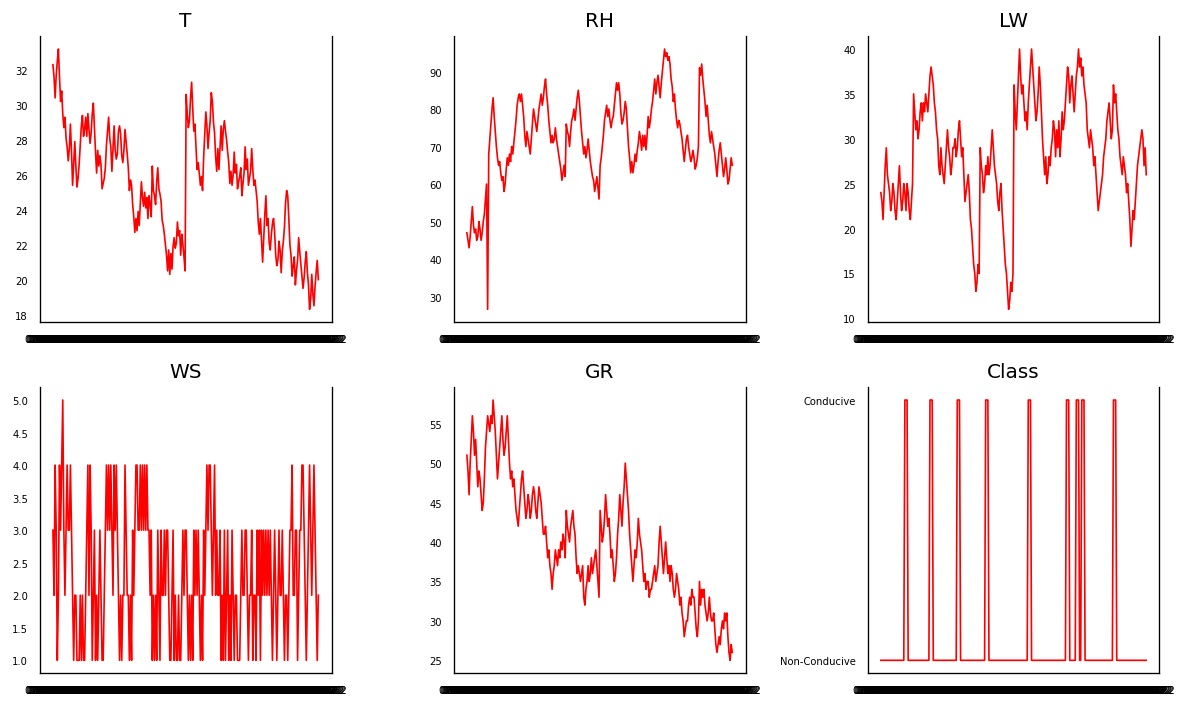

In [95]:
fig, axes = plt.subplots(nrows=2, ncols=3, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    mdata = data[data.columns[i]]
    print(i)
    ax.plot(mdata, color='red', linewidth=1)
    # Decorations
    ax.set_title(data.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout()

In [96]:
ad_fuller_result_1 = adfuller(data['T'].diff()[1:])

print('realgdp')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(data['RH'].diff()[1:])

print('realcons')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

print('\n---------------------\n')

ad_fuller_result_3 = adfuller(data['LW'].diff()[1:])

print('realcons')
print(f'ADF Statistic: {ad_fuller_result_3[0]}')
print(f'p-value: {ad_fuller_result_3[1]}')

print('\n---------------------\n')

ad_fuller_result_4 = adfuller(data['WS'].diff()[1:])

print('realcons')
print(f'ADF Statistic: {ad_fuller_result_4[0]}')
print(f'p-value: {ad_fuller_result_4[1]}')

print('\n---------------------\n')

ad_fuller_result_5 = adfuller(data['GR'].diff()[1:])

print('realcons')
print(f'ADF Statistic: {ad_fuller_result_5[0]}')
print(f'p-value: {ad_fuller_result_5[1]}')

realgdp
ADF Statistic: -11.298218643483823
p-value: 1.3273239059982555e-20

---------------------

realcons
ADF Statistic: -18.519891802790102
p-value: 2.1093654415574838e-30

---------------------

realcons
ADF Statistic: -15.146909752911064
p-value: 6.884049997584416e-28

---------------------

realcons
ADF Statistic: -6.624145343743119
p-value: 5.9343592101234755e-09

---------------------

realcons
ADF Statistic: -7.996375634180161
p-value: 2.3981280799692343e-12


In [97]:
print('temp causes RH?\n')
print('------------------')
granger_1 = grangercausalitytests(data[['RH', 'T']], 4)

#grangerrev_1 = grangercausalitytests(data[['tavg', 'tempmin']], 4)
print('\n RH causes temp?\n')
print('------------------')
granger_2 = grangercausalitytests(data[['T', 'RH']], 4)

temp causes RH?

------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0013  , p=0.9715  , df_denom=240, df_num=1
ssr based chi2 test:   chi2=0.0013  , p=0.9713  , df=1
likelihood ratio test: chi2=0.0013  , p=0.9713  , df=1
parameter F test:         F=0.0013  , p=0.9715  , df_denom=240, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.3916  , p=0.0353  , df_denom=237, df_num=2
ssr based chi2 test:   chi2=6.9262  , p=0.0313  , df=2
likelihood ratio test: chi2=6.8289  , p=0.0329  , df=2
parameter F test:         F=3.3916  , p=0.0353  , df_denom=237, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.5615  , p=0.0556  , df_denom=234, df_num=3
ssr based chi2 test:   chi2=7.9145  , p=0.0478  , df=3
likelihood ratio test: chi2=7.7873  , p=0.0506  , df=3
parameter F test:         F=2.5615  , p=0.0556  , df_denom=234, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F 

In [98]:
macro_data = data[['T', 'RH', 'LW', 'WS', 'GR']]
print(macro_data.shape)


(244, 5)


In [99]:
train_df=macro_data[:-12]
test_df=macro_data[-12:]

In [100]:
print(test_df.shape)

(12, 5)


In [101]:
model = VAR(train_df.diff()[1:])

In [102]:
sorted_order = model.select_order(maxlags=20)
print(sorted_order.summary())


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        4.585      4.664*       97.99       4.617
1        4.267       4.744       71.35      4.460*
2       4.242*       5.115      69.56*       4.595
3        4.319       5.590       75.24       4.833
4        4.446       6.114       85.60       5.121
5        4.555       6.620       95.72       5.390
6        4.593       7.055       99.86       5.588
7        4.754       7.614       118.1       5.910
8        4.806       8.063       125.4       6.123
9        4.791       8.445       124.8       6.268
10       4.734       8.784       119.4       6.371
11       4.658       9.106       112.5       6.456
12       4.757       9.602       126.7       6.715
13       4.847       10.09       141.9       6.966
14       4.875       10.51       150.1       7.155
15       4.909       10.95       160.5       7.349
16       4.991       11.42     

In [103]:
var_model = VARMAX(train_df, order=(4, 0), enforce_stationarity=True)
fitted_model = var_model.fit(disp=False)
print(fitted_model.summary())

                                 Statespace Model Results                                
Dep. Variable:     ['T', 'RH', 'LW', 'WS', 'GR']   No. Observations:                  232
Model:                                    VAR(4)   Log Likelihood               -2169.766
                                     + intercept   AIC                           4579.531
Date:                           Mon, 20 Feb 2023   BIC                           4993.140
Time:                                   18:17:35   HQIC                          4746.335
Sample:                                        0                                         
                                           - 232                                         
Covariance Type:                             opg                                         
Ljung-Box (L1) (Q):     0.06, 0.02, 0.00, 0.00, 0.19   Jarque-Bera (JB):   1878.25, 3208.49, 159.81, 2.77, 11.29
Prob(Q):                0.81, 0.89, 0.95, 0.95, 0.66   Prob(JB):             

In [104]:
n_forecast = 12
predict = fitted_model.get_prediction(start=len(train_df),end=len(train_df) + n_forecast-1)#start="1989-07-01",end='1999-01-01')

predictions=predict.predicted_mean

In [105]:
predictions.columns = ['T', 'RH', 'LW', 'WS', 'GR']
predictions

#append predictions to dataset
data = data.append(predictions)
data.to_csv('predicted/test.csv')


In [106]:
test_vs_pred=pd.concat([test_df,predictions],axis=1)

<AxesSubplot: >

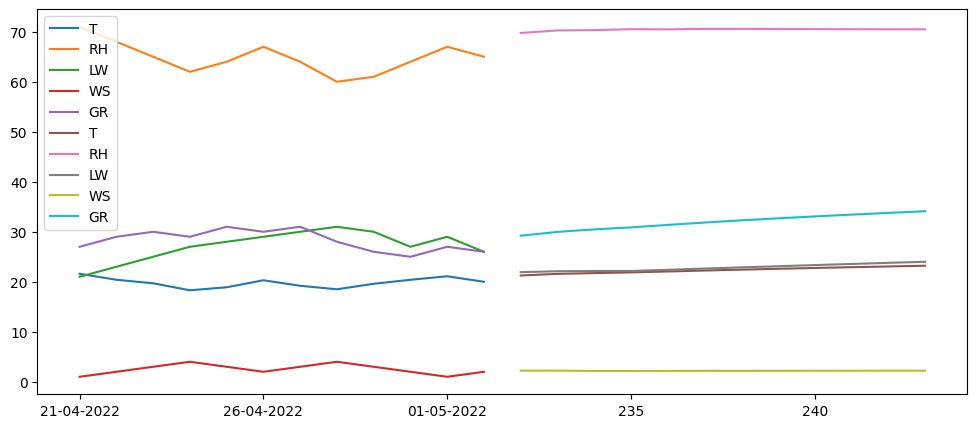

In [107]:
test_vs_pred.plot(figsize=(12,5))

In [108]:
from sklearn.metrics import mean_squared_error
import math 
from statistics import mean

rmse_temp=math.sqrt(mean_squared_error(predictions['T'],test_df['T']))
print('Mean value of temp is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['T']),rmse_temp))

rmse_RH=math.sqrt(mean_squared_error(predictions['RH'],test_df['RH']))
print('Mean value of RH is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['RH']),rmse_RH))

rmse_LW=math.sqrt(mean_squared_error(predictions['LW'],test_df['LW']))
print('Mean value of LW is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['LW']),rmse_LW))


rmse_WS=math.sqrt(mean_squared_error(predictions['WS'],test_df['WS']))
print('Mean value of WS is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['WS']),rmse_WS))

rmse_GR=math.sqrt(mean_squared_error(predictions['GR'],test_df['GR']))
print('Mean value of GR is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['GR']),rmse_GR))

Mean value of temp is : 19.833333333333332. Root Mean Squared Error is :2.7374061713450715
Mean value of RH is : 64.83333333333333. Root Mean Squared Error is :6.407677926264964
Mean value of LW is : 27.166666666666668. Root Mean Squared Error is :5.043688403948861
Mean value of WS is : 2.5. Root Mean Squared Error is :1.0181040267154997
Mean value of GR is : 28.25. Root Mean Squared Error is :4.740003344572258
